# Problem Statement 
To predict and intervene Credit Card customers before they renounce Credit card usage 

Background & Context

Bank noticed a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas


# Objective:
- To predict and intervene Credit Card customers before they renounce Credit card usage. What are the different factors which affect this? What business recommendations can we give based on the analysis?
- How can we improve model performance using hyperparameter tuning and prevent data leakage using pipelines while building a model to predict the response of a customer?

### Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio



## Import necessary libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

## Load and view the dataset

In [3]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
data = pd.read_csv("/gdrive/MyDrive/Dataset/BankChurners.csv")

In [5]:
data.head()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000

[5 rows x 21 columns]

In [6]:
data.tail()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
10122  772366833  Existing Customer  ...                0.857                 0.462
10123  710638233  Attrited Customer  ...                0.683                 0.511
10124  716506083  Attrited Customer  ...                0.818                 0.000
10125  717406983  Attrited Customer  ...                0.722                 0.000
10126  714337233  Attrited Customer  ...                0.649                 0.189

[5 rows x 21 columns]

**Let's check the number of unique values in each column**

In [7]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- There are total 20 columns and 10127 observations in the dataset
- We have a lot of categorical columns and a few continous features.
- There are no missing values in any features.

In [8]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- All features have valid data

- We can drop the column - `CLIENTNUM' as it is unique for each customer and will not add value to the model.

In [9]:
# Dropping columns - CLIENTNUM
data.drop(columns=["CLIENTNUM"], inplace=True)

**Summary of the data**

In [10]:
data.describe().T

count         mean  ...        75%        max
Customer_Age              10127.0    46.325960  ...     52.000     73.000
Dependent_count           10127.0     2.346203  ...      3.000      5.000
Months_on_book            10127.0    35.928409  ...     40.000     56.000
Total_Relationship_Count  10127.0     3.812580  ...      5.000      6.000
Months_Inactive_12_mon    10127.0     2.341167  ...      3.000      6.000
Contacts_Count_12_mon     10127.0     2.455317  ...      3.000      6.000
Credit_Limit              10127.0  8631.953698  ...  11067.500  34516.000
Total_Revolving_Bal       10127.0  1162.814061  ...   1784.000   2517.000
Avg_Open_To_Buy           10127.0  7469.139637  ...   9859.000  34516.000
Total_Amt_Chng_Q4_Q1      10127.0     0.759941  ...      0.859      3.397
Total_Trans_Amt           10127.0  4404.086304  ...   4741.000  18484.000
Total_Trans_Ct            10127.0    64.858695  ...     81.000    139.000
Total_Ct_Chng_Q4_Q1       10127.0     0.712222  ...      0.818      3.714
Avg_Utilization_Ratio     10127.0     0.274894  ...      0.503      0.999

[14 rows x 8 columns]

- Cutomer are primarily in the age group 40s
- Typical bank relationship with customer is 3 years
- On an average, customer hold 4 accounts with the bank
- Customers were contacted only 2 times(on an average) in the last year. This can be significantly improved.
- Average credit limit is around 4500. This can be explored futher to incentivize customers. 
- Total Revovling balance appears low on an avergae. With increased limit, this can potentially go up
- Total transaction amount for teh l;ast 12 months appears low. Offering deals with merchants could be a good marekting scheme.
- Average number of transaction is 65/year, which equates to 5 per month and that appears low. Needs investing furher as to which merchants the anonymised customers prefer
- Likewise, the utilization ratio is low. Is it possible that customers prefer to use other credit cards instead.
- None of the features appears to have erroreneous data


## Data Preprocessing

Lets convert features from object to catergories

In [11]:
obj_cols = [
   "Attrition_Flag",           
   "Gender",                   
   "Education_Level",          
   "Marital_Status",           
   "Income_Category",
   "Card_Category",
]
for i in obj_cols:
  data[i] = data[i].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

**Let's check the count of each unique category in each of the categorical variables.** 

In [12]:
cat_cols = [
   "Attrition_Flag", 
   "Gender", 
   "Dependent_count",
   "Education_Level",          
   "Marital_Status",           
   "Income_Category",
   "Card_Category",
   "Total_Relationship_Count",
   "Months_Inactive_12_mon",
   "Contacts_Count_12_mon"
]
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
---------------

- 3 categorical column have lot of values with Unknown type. We will run KNN imputation on these features later 

In [13]:
#Replace Unknown with NaN
if(True==False):
  data['Education_Level'] = data['Education_Level'].replace(to_replace=r'Unknown', value=np.nan, regex=True)
  data['Marital_Status'] = data['Marital_Status'].replace(to_replace=r'Unknown', value=np.nan, regex=True)
  data['Income_Category'] = data['Income_Category'].replace(to_replace=r'Unknown', value=np.nan, regex=True)

  for column in cat_cols:
      print(data[column].value_counts())
      print('-'*30)

In [14]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## EDA

### Univariate

In [15]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

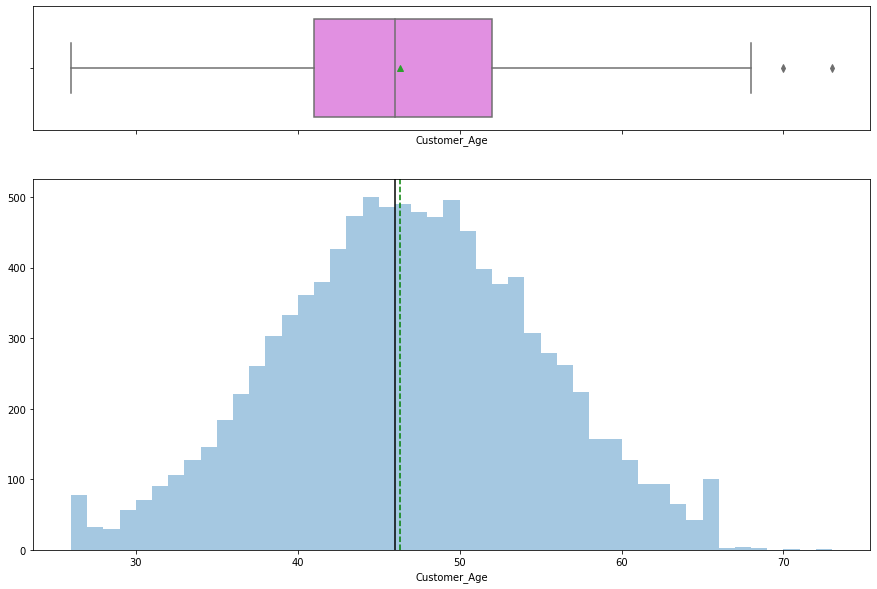

In [16]:
# Observations on Customer_age
histogram_boxplot(data["Customer_Age"])

- As per the boxplot, there are no outliers in 'Customer_Age' variable
- Age has a fairly normal distribution distribution with approx equal mean and median
- Underserved age category of customers belong to the age group of 20 to 30 year olds and 65 and over

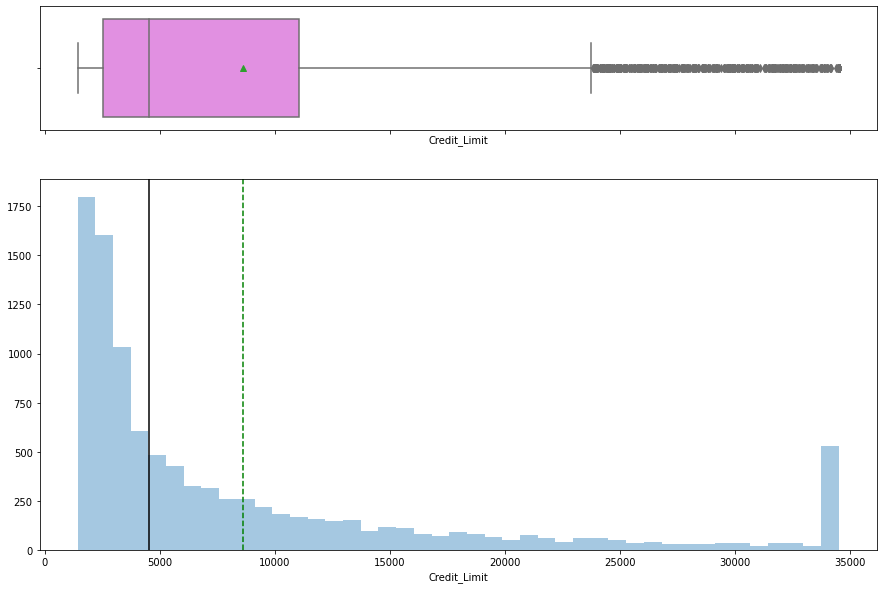

In [17]:
# observations on Credit_Limit
histogram_boxplot(data["Credit_Limit"])

- We can see the feature Credit_Limit is significantly right sweked
- There is a significnt amount of outliers near $3400. This could be the highest credit card type (Platinum) 

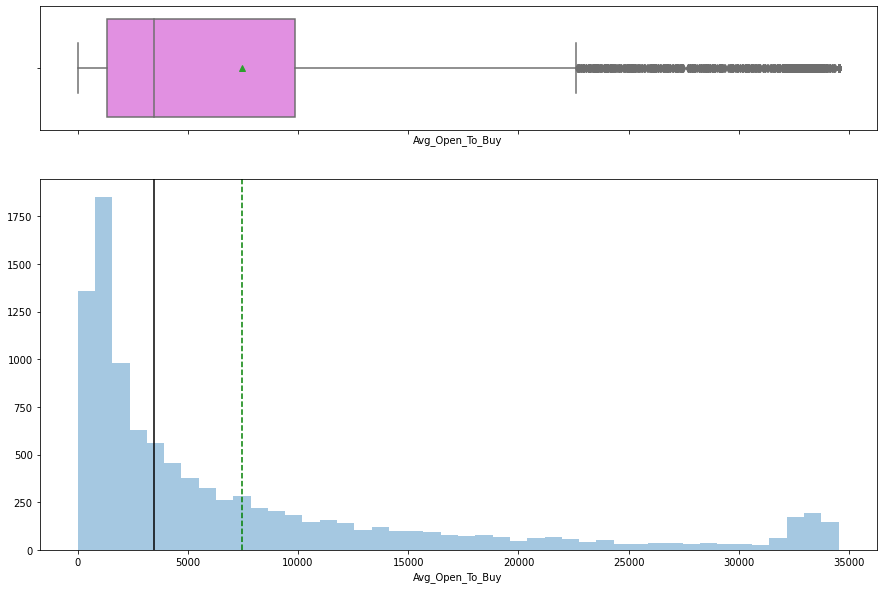

In [18]:
histogram_boxplot(data["Avg_Open_To_Buy"])

- There are a few outliers in 'Open to Buy Credit Card' variable. Again, they could be Platinum CC category

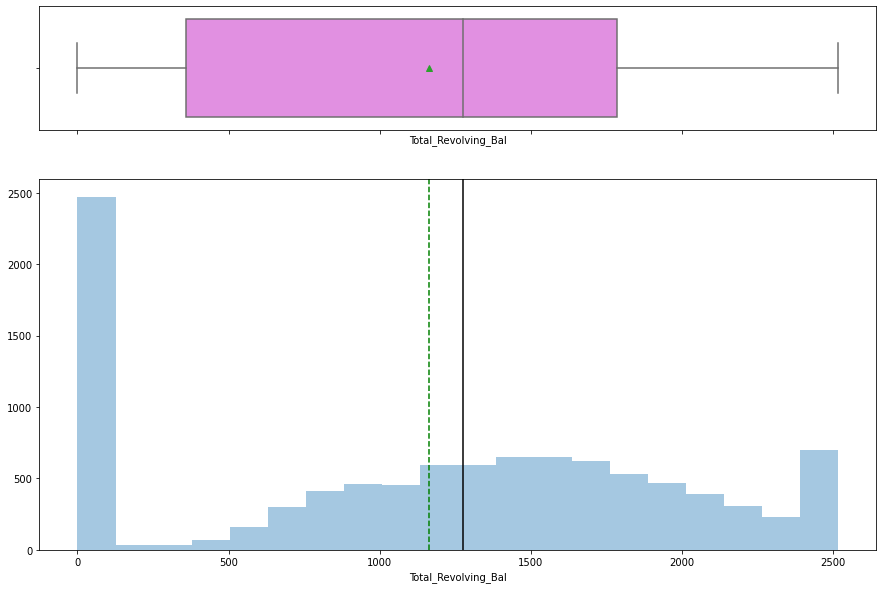

In [19]:
histogram_boxplot(data["Total_Revolving_Bal"])

- Distrbution appear normal with outliers on either ends
- Most customers carry low balance. Mean is around 1250. Some customers carry higher $2500 balances too. Could they be offered higher Credit limit


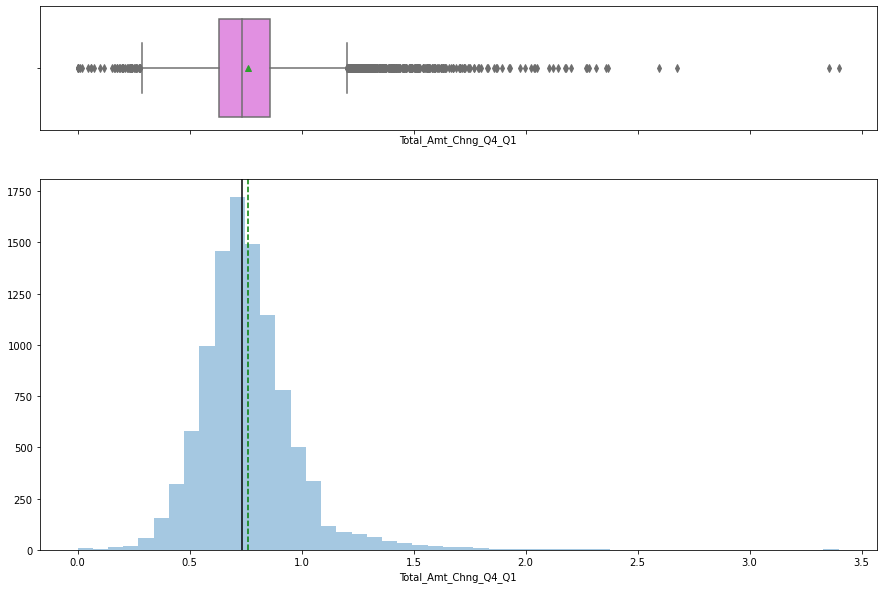

In [20]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])


- This feature is normally distributed, with uniform outliers

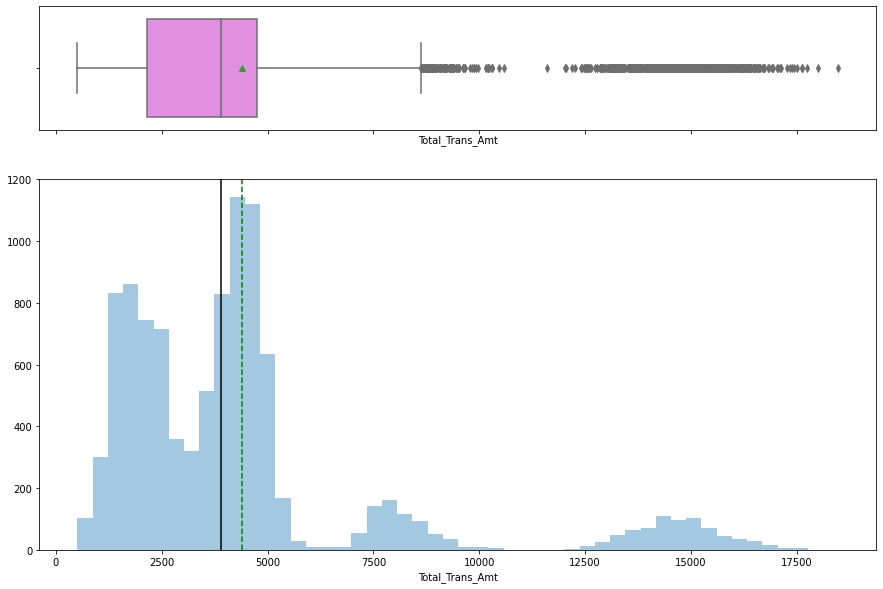

In [21]:
histogram_boxplot(data["Total_Trans_Amt"])


- Transaction Amount  looks to be a bimodal distribution. 
- Customers with high transaction amounts could be offered more cards to improve relationship

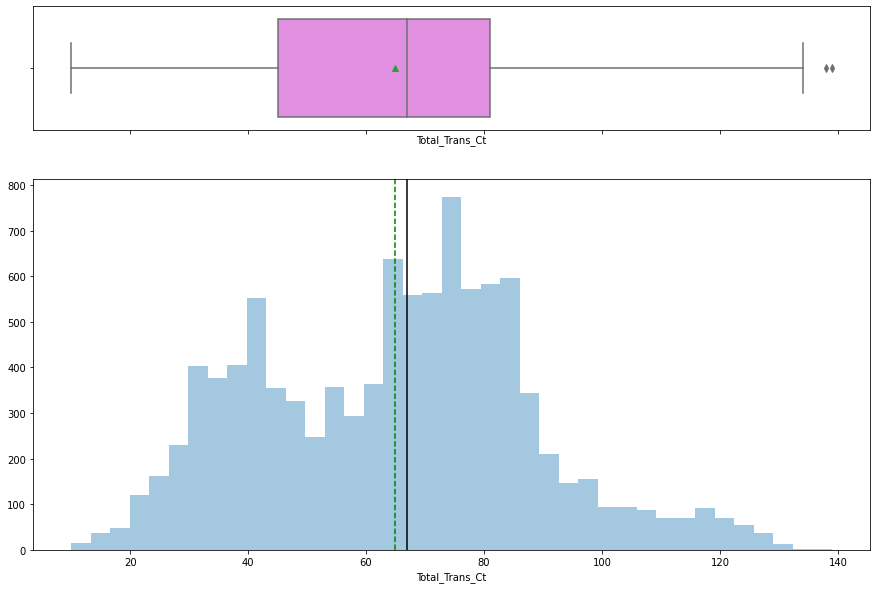

In [22]:
histogram_boxplot(data["Total_Trans_Ct"])

- Appears to be normally distributed and no outliers 

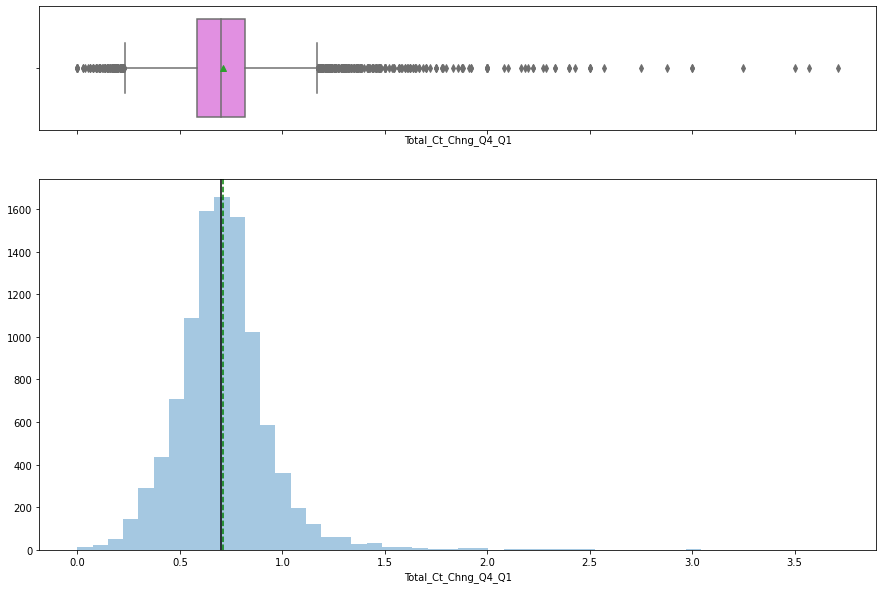

In [23]:
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- Q4 to Q1 change is normally distributed but has a lot of outliers

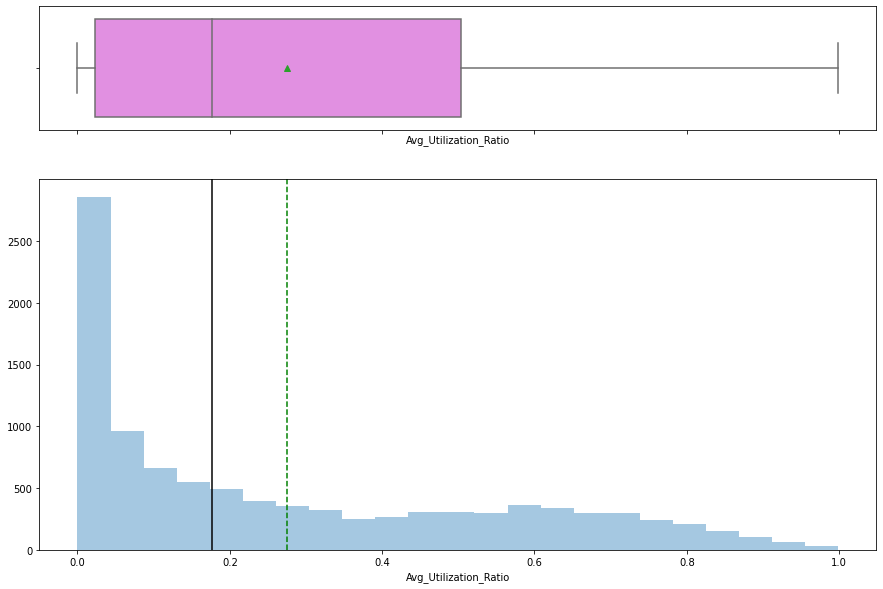

In [24]:
histogram_boxplot(data["Avg_Utilization_Ratio"])

- Significant proportion of users are underutilizing the card. Mean and median is around 25% only.

# Observations on Categorical features

In [25]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

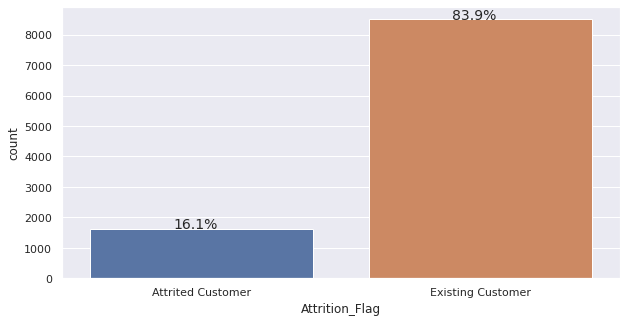

In [26]:
perc_on_bar(data["Attrition_Flag"])

- There is data imbalance with only 16% for minority class

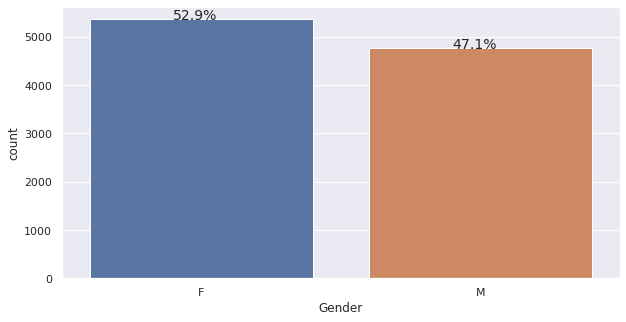

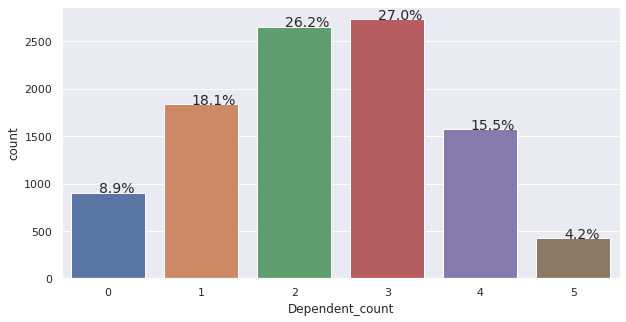

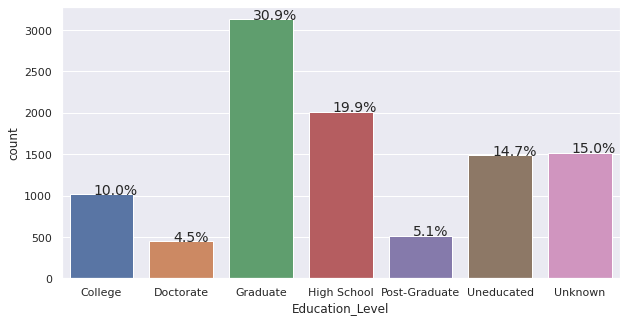

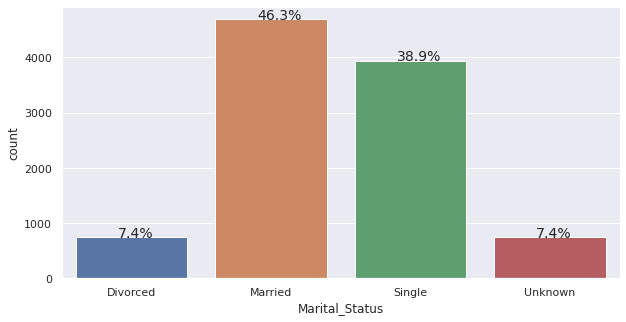

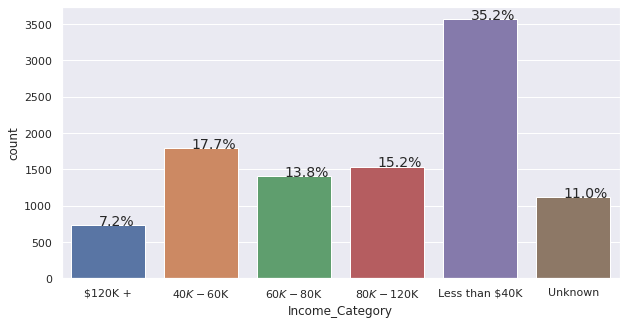

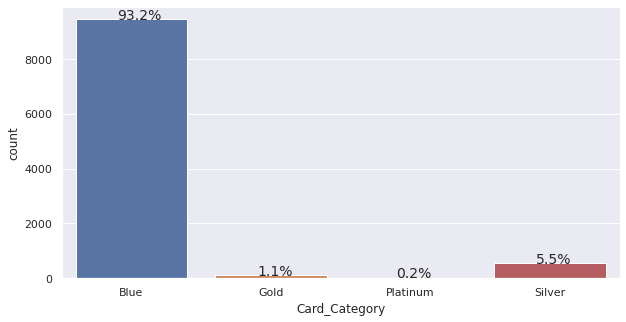

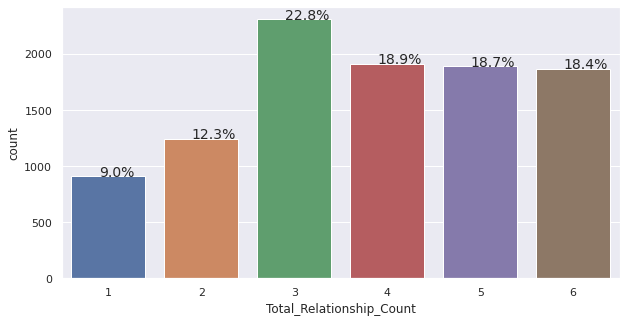

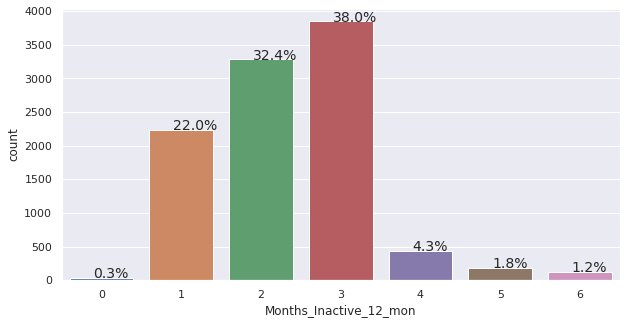

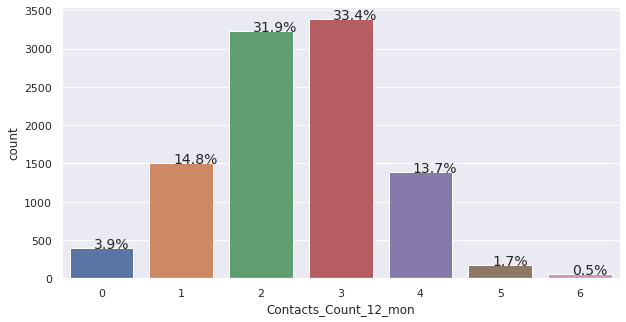

In [27]:
perc_on_bar(data["Gender"])
perc_on_bar(data["Dependent_count"])
perc_on_bar(data["Education_Level"])
perc_on_bar(data["Marital_Status"])
perc_on_bar(data["Income_Category"])
perc_on_bar(data["Card_Category"])
perc_on_bar(data["Total_Relationship_Count"])
perc_on_bar(data["Months_Inactive_12_mon"])
perc_on_bar(data["Contacts_Count_12_mon"])

- Gender is equally distributed.
- Blue cards are the most pouplar at 93%. We can invetigate which customers could be offered other cards. 
- Interesting to note that ~80% customers have 3 or more accounts
- Months inactive have a increasing linear trend from 1 to 3 months and then there is a sharp drop, which might imply  that the account was closed or customers started reusing accounts
- Customers were contacted generally only contacted 2 to 3 times. If this is increased, we could get valuable feedback in the 3 months of inactivity then the attrition could be reduced. 

### Bivariate Analysis

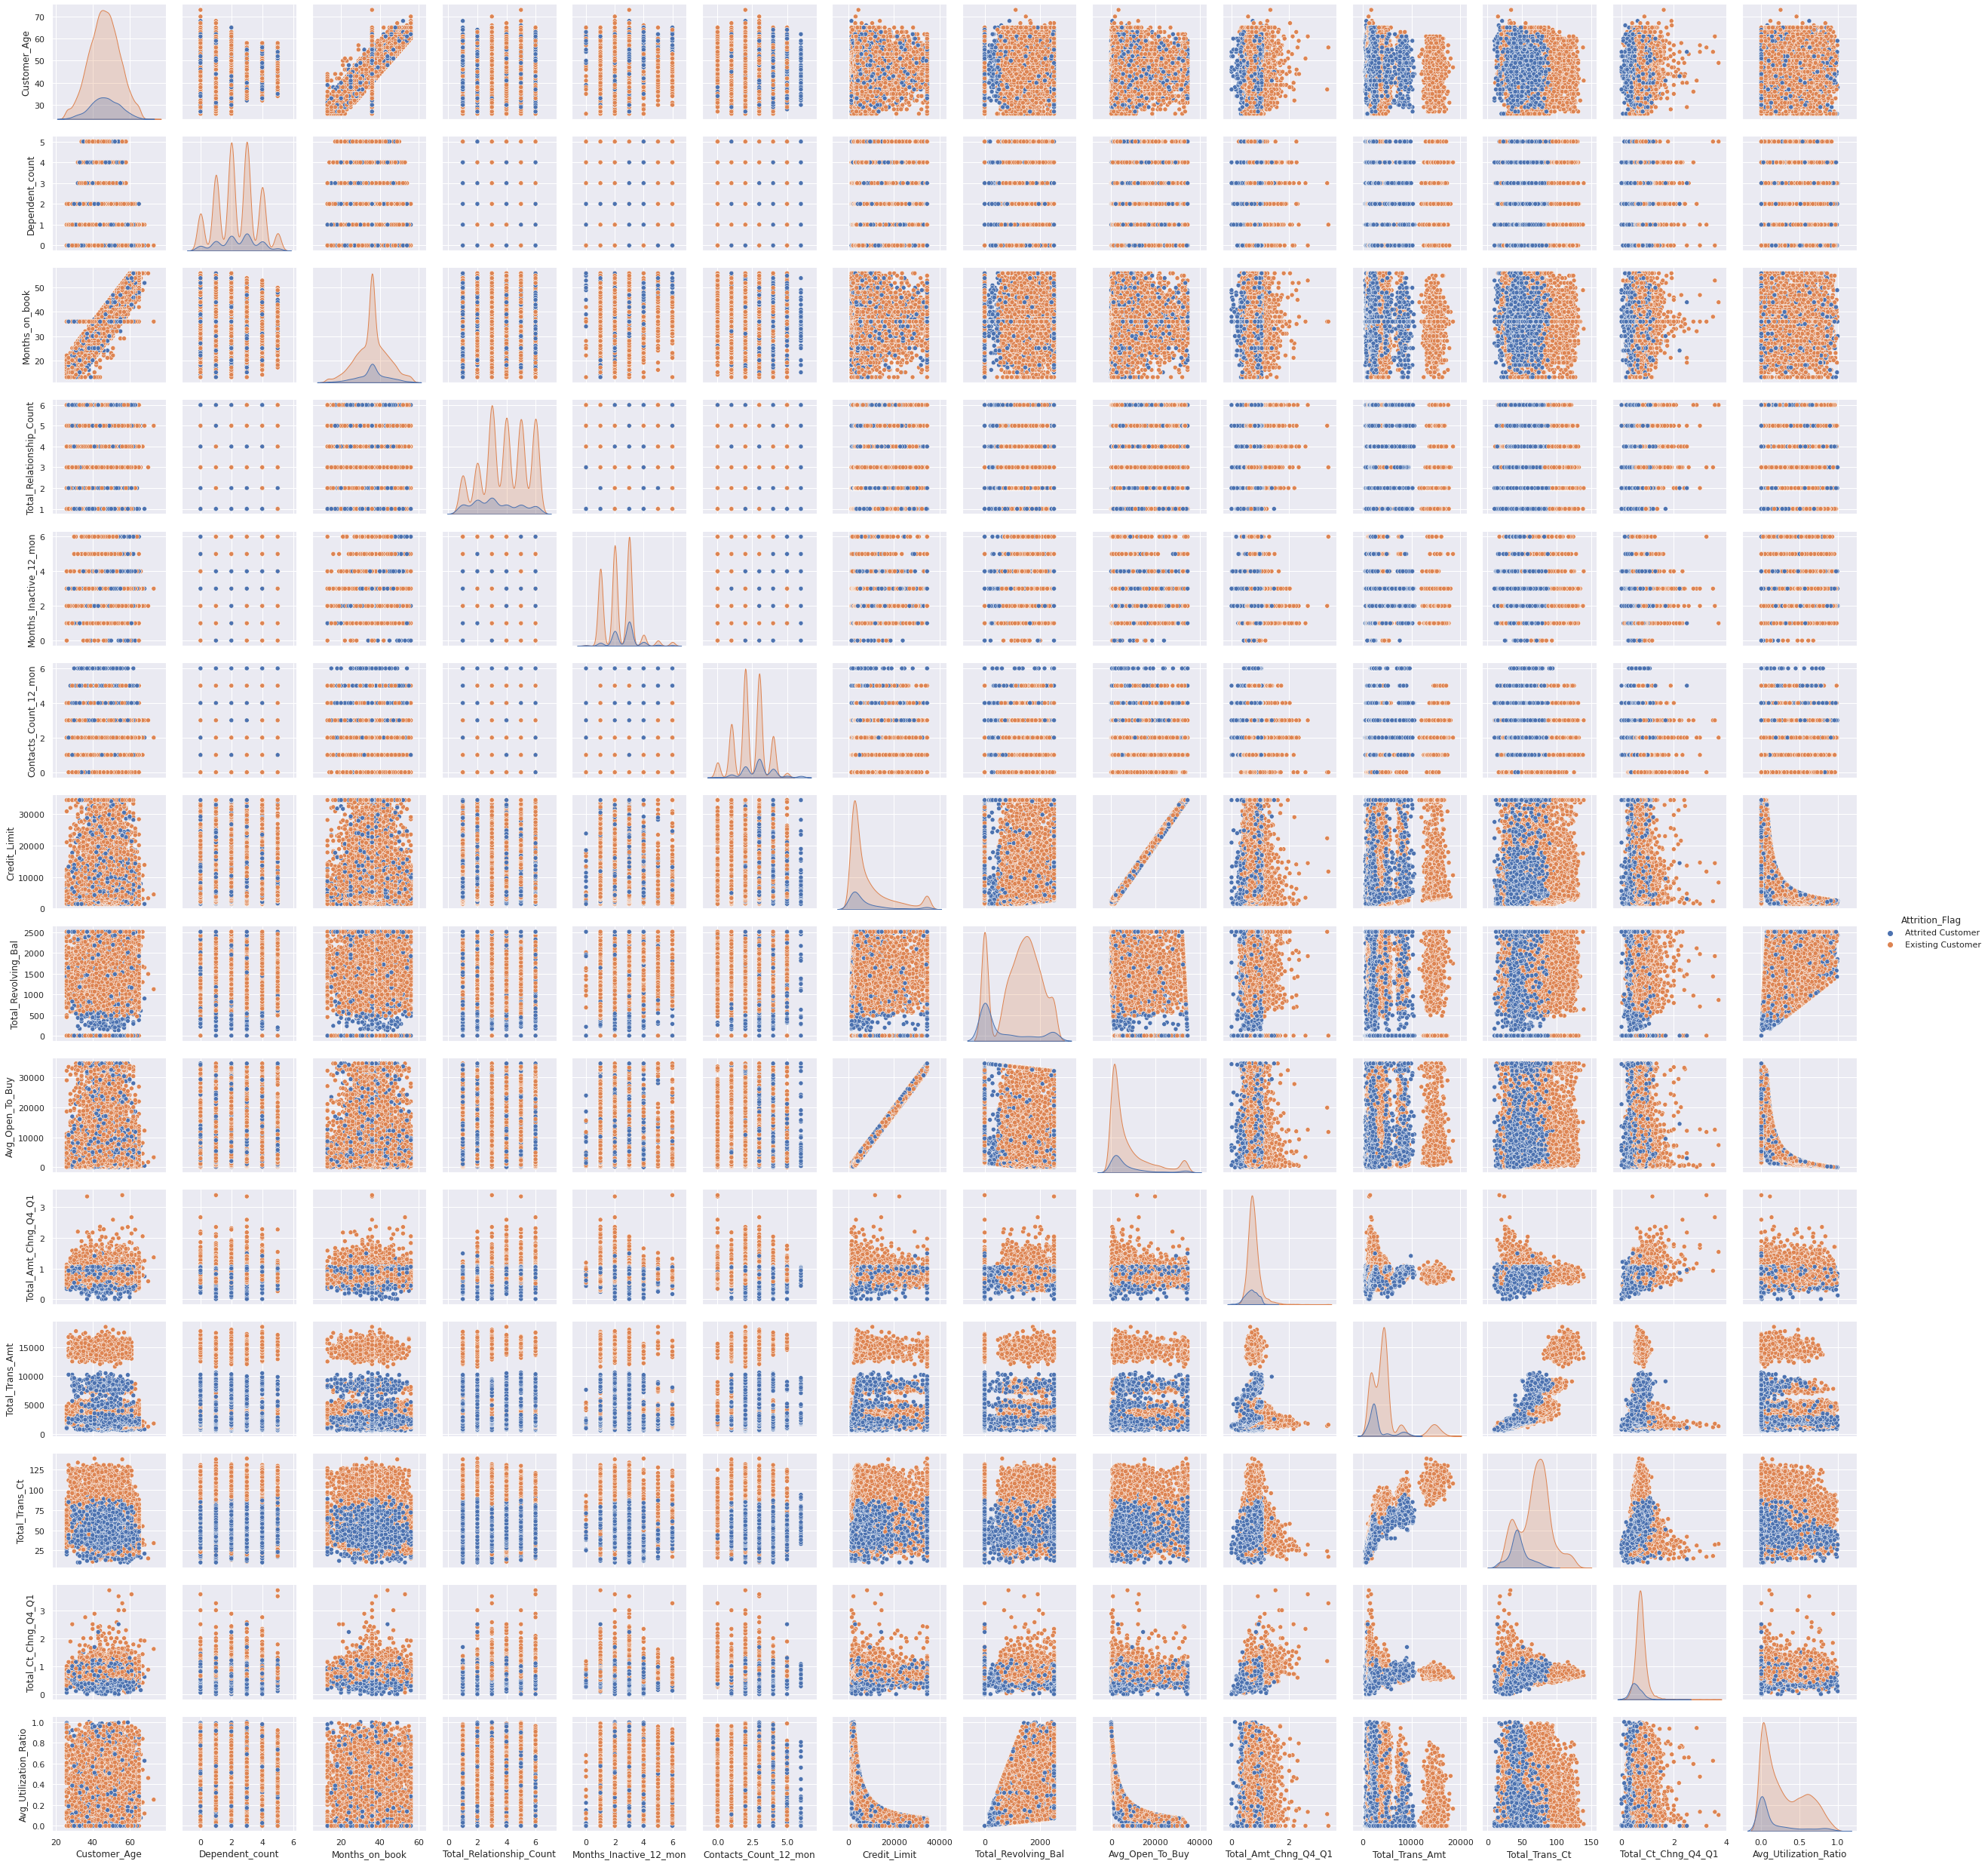

In [28]:
#Pairplot with hue of the target feature
sns.pairplot(data, hue="Attrition_Flag")

- Some features have high corelation - Customer age and Month on Books, Credit Limit and Average Open to buy.


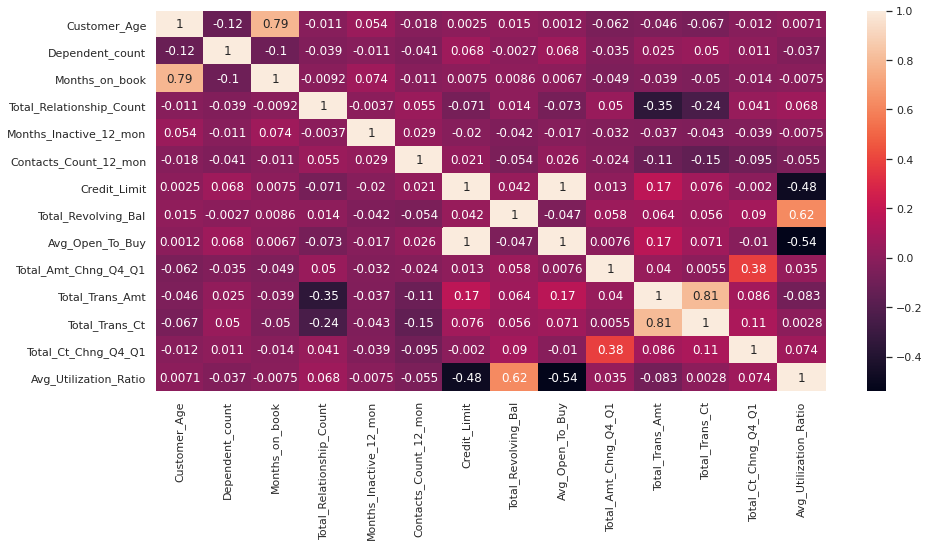

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

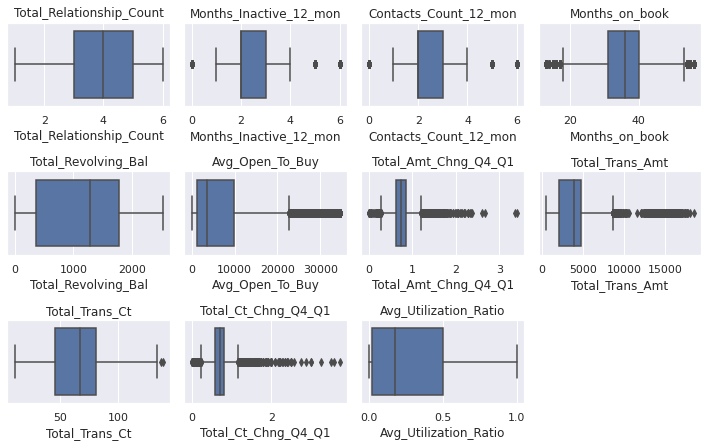

In [30]:
cols = data[
    [
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Months_on_book",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio"    
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(5,4, i + 1)
    sns.boxplot(data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Some features have a lot of outliers which are uniformly distributed. We will leave them as-is, since these datapoints will later help in reducing Data Imbalance with SMOTE 

## Data Preparation

In [31]:
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
---------------

In [32]:
gender = {'F':1,'M':2}
data['Gender']=data['Gender'].map(gender)
education = {'Graduate':1, 'High School':2, 'Uneducated':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
data['Education_Level']=data['Education_Level'].map(education)
marital_status = {'Married':1,'Single':2, 'Divorced':3}
data['Marital_Status']=data['Marital_Status'].map(marital_status)
income = {'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
data['Income_Category']=data['Income_Category'].map(income)
card_category = {'Blue':1,'Silver':2, 'Gold':3, 'Platinum':4}
data['Card_Category']=data['Card_Category'].map(card_category)

attrition_category= {'Existing Customer':1,'Attrited Customer':0}
data['Attrition_Flag']=data['Attrition_Flag'].map(attrition_category)

In [33]:
#To verify mapping
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

1    8500
0    1627
Name: Attrition_Flag, dtype: int64
------------------------------
1    5358
2    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
1.0    3128
2.0    2013
3.0    1487
4.0    1013
5.0     516
6.0     451
Name: Education_Level, dtype: int64
------------------------------
1.0    4687
2.0    3943
3.0     748
Name: Marital_Status, dtype: int64
------------------------------
1.0    3561
2.0    1790
4.0    1535
3.0    1402
5.0     727
Name: Income_Category, dtype: int64
------------------------------
1    9436
2     555
3     116
4      20
Name: Card_Category, dtype: int64
------------------------------
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64
------------------------------
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   float64 
 5   Marital_Status            9378 non-null   float64 
 6   Income_Category           9015 non-null   float64 
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

**Split the data into train and test sets** 

In [35]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

In [36]:
# Dropping Highly correlated features Avg_Open_To_Buy(High Correlation with Credit Limit) and Months_on_book
X.drop(
    columns=[
        "Avg_Open_To_Buy",
        "Months_on_book",
    ],
    inplace=True,
)

In [37]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


In [38]:
y_train.value_counts(1)

1    0.839306
0    0.160694
Name: Attrition_Flag, dtype: float64

We only have 16% of negative classes, so if our model marks each sample as positive, then also we'll get over 90% accuracy, hence accuracy is not a good metric to evaluate here. 

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [39]:
imputer = KNNImputer(n_neighbors=5)

In [40]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [41]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct            

* All missing values have been treated.


In [42]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [43]:
inverse_mapping(gender,'Gender')
inverse_mapping(education,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income,'Income_Category')
inverse_mapping(card_category,'Card_Category')

* Checking inverse mapped values/categories.

In [44]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3773
M    3315
Name: Gender, dtype: int64
******************************
Graduate         2259
High School      1936
Uneducated       1447
College           765
Post-Graduate     359
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3480
Single      3092
Divorced     516
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2665
$40K - $60K       1490
$80K - $120K      1217
$60K - $80K       1198
$120K +            518
Name: Income_Category, dtype: int64
******************************
Blue        6615
Silver       378
Gold          84
Platinum      11
Name: Card_Category, dtype: int64
******************************


In [45]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3773
M    3315
Name: Gender, dtype: int64
******************************
Graduate         2259
High School      1936
Uneducated       1447
College           765
Post-Graduate     359
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3480
Single      3092
Divorced     516
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2665
$40K - $60K       1490
$80K - $120K      1217
$60K - $80K       1198
$120K +            518
Name: Income_Category, dtype: int64
******************************
Blue        6615
Silver       378
Gold          84
Platinum      11
Name: Card_Category, dtype: int64
******************************


* Inverse mapping returned original labels.

### Encoding categorical variables

In [46]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 27) (3039, 27)


* After encoding there are 27 columns.

## Baseline Logistic regression model with SMOTE for Data Imbalance

In [47]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

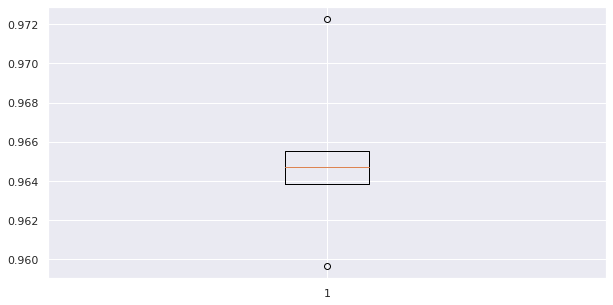

In [48]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [49]:
##Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [50]:
#Calculating different metrics
scores_LR = get_score(lr,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.8902370203160271
Accuracy on test set :  0.8877920368542284
Recall on training set :  0.9655404269625147
Recall on test set :  0.9698157585260682
Precision on training set :  0.9092923856260884
Precision on test set :  0.9035792549306063


-
Logistic Regression has given a generalized performance on training and test set.
Recall is very also very good, let's see if the model performance can be further improved by:

a) Oversampling - getting more data points for the minority class.

b) Undersampling - dealing with the class imbalance.

 

### Oversampling train data using SMOTE

In [51]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))


Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on oversampled data

In [52]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

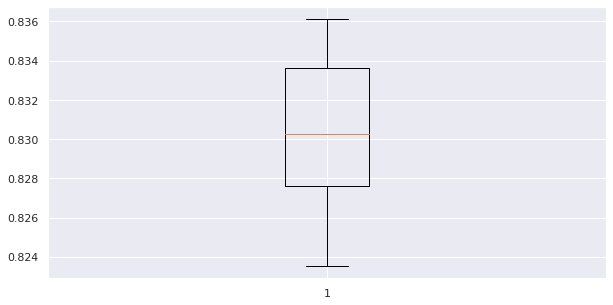

In [53]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [54]:
#Calculating different metrics
get_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

Accuracy on training set :  0.8377878635064717
Accuracy on test set :  0.8209937479434024
Recall on training set :  0.8349302403765338
Recall on test set :  0.8286946295570364
Precision on training set :  0.8397295012679628
Precision on test set :  0.9518235029266097


[0.8377878635064717,
 0.8209937479434024,
 0.8349302403765338,
 0.8286946295570364,
 0.8397295012679628,
 0.9518235029266097]

- Oversampling didnt improve the baseline metrics. Baseline model is better

---



### Regularization

In [55]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Calculating different metrics
get_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

Accuracy on training set :  0.7071776769204908
Accuracy on test set :  0.807502467917078
Recall on training set :  0.8545974113296352
Recall on test set :  0.8573108584868679
Precision on training set :  0.6600025963910164
Precision on test set :  0.9082225913621262


[0.7071776769204908,
 0.807502467917078,
 0.8545974113296352,
 0.8573108584868679,
 0.6600025963910164,
 0.9082225913621262]

- Regularization didnt improve the model performance

### Undersampling train data using SMOTE

In [57]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [58]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 27)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [59]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

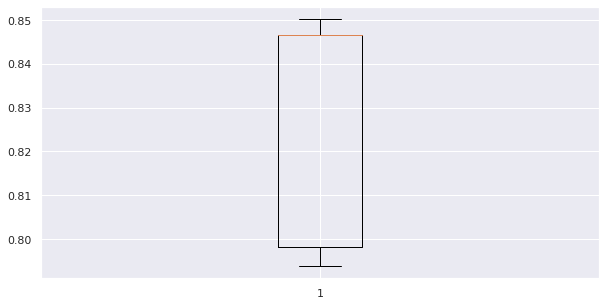

In [60]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [61]:
#Calculating different metrics
get_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)

Accuracy on training set :  0.8362598770851625
Accuracy on test set :  0.8150707469562356
Recall on training set :  0.8305531167690957
Recall on test set :  0.8157585260682085
Precision on training set :  0.8401420959147424
Precision on test set :  0.9576622181316152


[0.8362598770851625,
 0.8150707469562356,
 0.8305531167690957,
 0.8157585260682085,
 0.8401420959147424,
 0.9576622181316152]

- Undersampling didnt change teh model performance either

# Building the model pipeline

### Model evaluation criterion:
#### Model can make wrong predictions as:
1. Predicting a customer will stop using the credit card  and the customer doesn't - Loss of resources
2. Predicting a customer will not buy stop using the credit card and the customer does - Loss of opportunity

#### Which case is more important? 
Second case is more important with losing on a potential source of credit card revenue. Customer will not targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

### SMOTE for Data imbalance for model pipeline

In [62]:
# Upsampling using SMOTE to deal with data imbalance, after missig values were treated
oversample = SMOTE()
Xtrain, ytrain = oversample.fit_resample(X_train, y_train)

# summarize class distribution
print("Before SMOTE", Counter(y_train), sep='\n')
print("\nAfter SMOTE", Counter(ytrain), sep='\n')

Before SMOTE
Counter({1: 5949, 0: 1139})

After SMOTE
Counter({1: 5949, 0: 5949})


In [63]:
#Remapping for models 
X_train = Xtrain
y_train = ytrain

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [64]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "Bagging_classifier",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 85.93022877780211
DTREE: 94.2847813641857
RF: 97.56255874931973
Bagging_classifier: 95.8647405135309
GBM: 97.71380511834676
ADB: 96.23470044031069
XGB: 97.59618632987257


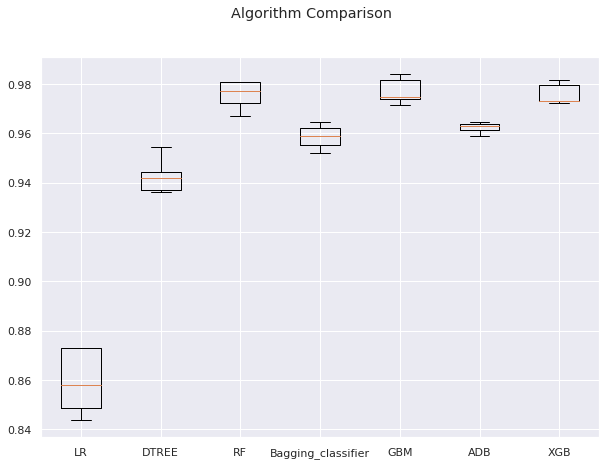

In [65]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- Boxplot shows that RF, GBM and XGB has the highest cross validated recall 
- AdaBoost is also good and has a few outliers, so we will Hypertune this instead of GBM to check its performance. We will also tune RF and XGB. 

## Hyperparameter Tuning

**We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline.**

**`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [66]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [67]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest

### GridSearchCV

In [68]:
%%time
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange(10, 110, 10),
    "randomforestclassifier__bootstrap": [True, False],
    "randomforestclassifier__criterion": ["gini", "entropy"]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 90} 
Score: 0.9806680283551603
CPU times: user 3min 58s, sys: 0 ns, total: 3min 58s
Wall time: 3min 57s


In [69]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=90,
        bootstrap= False,
        criterion='entropy',
        random_state=1,
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=90, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=F

Accuracy on training set :  1.0
Accuracy on test set :  0.9549193813754524
Recall on training set :  1.0
Recall on test set :  0.9839278714229713
Precision on training set :  1.0
Precision on test set :  0.9631619339984651


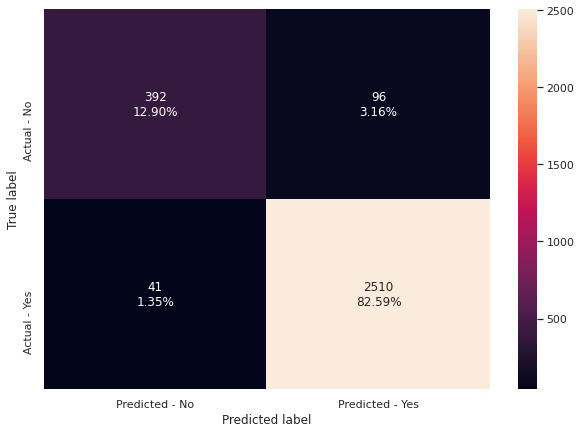

In [70]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

### RandomizedSearchCV

In [71]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange(10, 110, 10),
    "randomforestclassifier__bootstrap": [True, False],
    "randomforestclassifier__criterion": ["gini", "entropy"]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 90, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': False} with CV score=0.9806680283551603:
CPU times: user 3min 57s, sys: 0 ns, total: 3min 57s
Wall time: 3min 56s


- RF Model preformance has improved with hypertuned parameters found with GridsearchCV and RandomsearchCV
- RandomsearchCV and GridsearchCv took about the same time. If we tune more param_grid paramaters, then GridsearchCV will take longer

## AdaBoost

### GridSearchCV

In [72]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 100} 
Score: 0.987223781017874
CPU times: user 17min 7s, sys: 1.69 s, total: 17min 9s
Wall time: 17min 5s


In [73]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=2,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                      

Accuracy on training set :  0.9978147587829888
Accuracy on test set :  0.9693978282329714
Recall on training set :  0.9983190452176837
Recall on test set :  0.9843198745589965
Precision on training set :  0.9973131821998321
Precision on test set :  0.9793291731669267


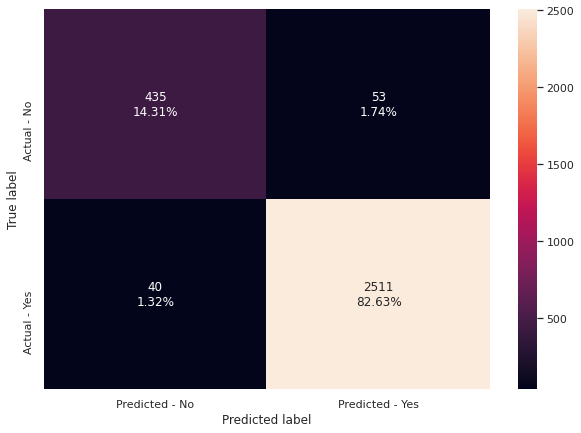

In [74]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has increased as compared to cross validated recall, even with outliers. 


### RandomizedSearchCV

In [75]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 60, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=0.9872234983143805:
CPU times: user 5min 55s, sys: 2.5 s, total: 5min 57s
Wall time: 5min 56s


- Grid search took significantly longer time(17 min) than random search(5min). 


## XGBoost

### GridSearchCV

In [76]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),'xgbclassifier__scale_pos_weight':[0,1,5,10],
            'xgbclassifier__learning_rate':[0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.9986551794813805:
CPU times: user 26min 46s, sys: 4.94 s, total: 26min 51s
Wall time: 26min 44s


In [77]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, learning_rate=0.01, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8393007228105563
Accuracy on test set :  0.9200394866732478
Recall on training set :  0.9818456883509834
Recall on test set :  0.9788318306546452
Precision on training set :  0.7640287769784173
Precision on test set :  0.9296351451973194


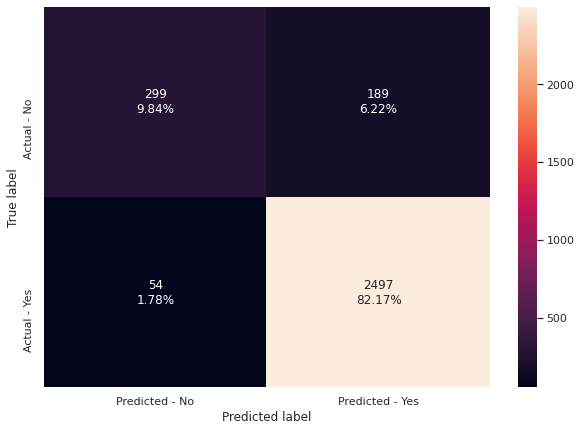

In [78]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased further after model tuning.
- Although both Test and Train recall is high, there is a chance that the  model is overfitting the training data. We could retrain the model with more data, if available

### RandomizedSearchCV

In [79]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 5, 'xgbclassifier__reg_lambda': 0, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 0} with CV score=1.0:
CPU times: user 7min 37s, sys: 1.04 s, total: 7min 38s
Wall time: 7min 36s


In [80]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, learning_rate=0.01, max_delta_step=0,
                               max_depth=2, min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.6952428979660447
Accuracy on test set :  0.8815399802566634
Recall on training set :  0.9979828542612204
Recall on test set :  0.9988239905919247
Precision on training set :  0.6216103025861166
Precision on test set :  0.8771084337349397


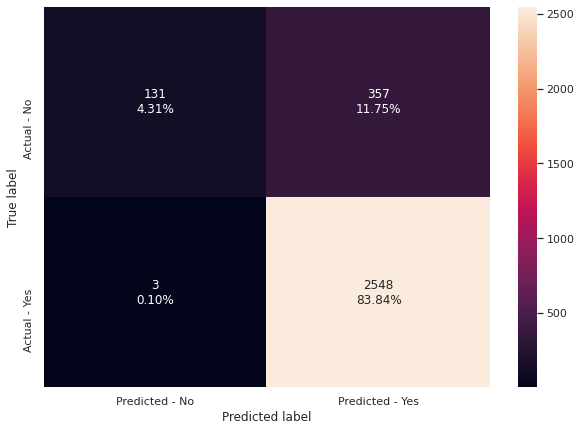

In [81]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Random search is much faster than Grid search. This is important for quick deployment and training.


## Comparing all models

In [82]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [83]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  ...  Test_Precision
3        XGBoost with RandomizedSearchCV  ...        0.877108
1  Decision Tree with RandomizedSearchCV  ...        0.972963
0        Decision Tree with GridSearchCV  ...        0.979329
2              XGBoost with GridSearchCV  ...        0.929635

[4 rows x 7 columns]

- The selected 3 models are all performing better after hypertuning on Recall, our metric selected for dataset
- Let's see the feature importance from the tuned xgboost model

In [84]:
from pandas import DataFrame
X_traindf = DataFrame (X_train,columns=X_test.columns)

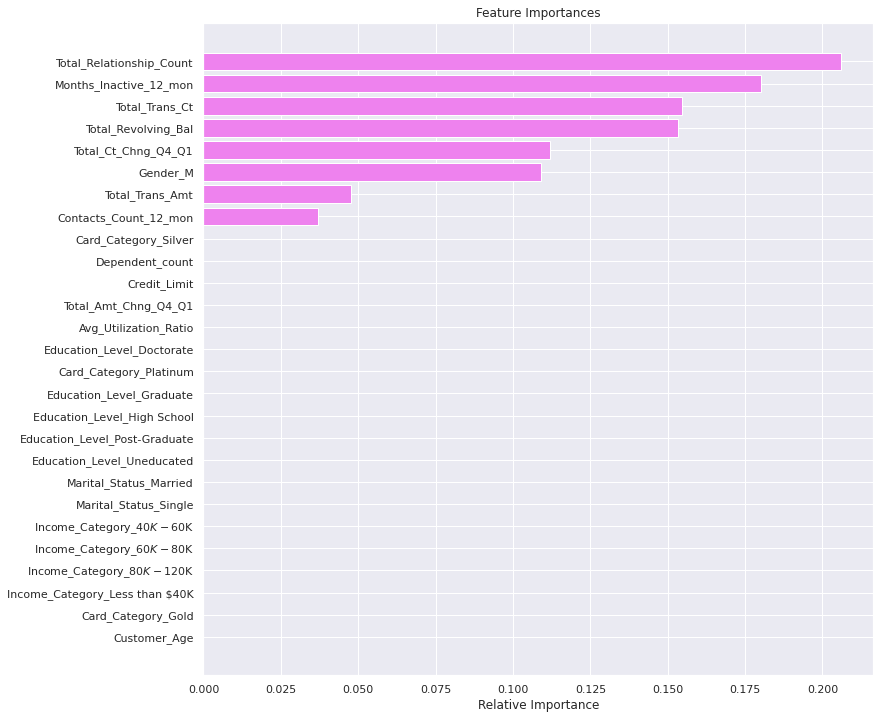

In [85]:
feature_names = X_traindf.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Based on feature importance, the most important feature is the number of cards held by the customer. This implies that we can offer more cards to select customers to prolong the relationship
- Next important feature is revolving balance. This is intuitive as a varying balance implies usage
- The next two important features are transaction count and amount, which is also intuitive. 

## Business Recommendations

- Months inactive have a increasing linear trend from 1 to 3 months and then there is a sharp drop, which might imply that the account was closed or customers started reusing accounts
- Customers were contacted generally only contacted 2 to 3 times. If this is increased, we could get valuable feedback in the 3 months of inactivity then the attrition could be reduced.
- Based on feature importance, the most important feature is the number of cards held by the customer. This implies that we can offer more cards to select customers to prolong the relationship
- Next important feature is revolving balance. This is intuitive as a varying balance implies usage
- The next two important features are transaction count and amount, which is also intuitive. 
- Blue cards are the most pouplar at 93%. We can invetigate which customers could be offered other cards.
- Interesting to note that ~80% customers have 3 or more accounts